In [14]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore') 
#np.set_printoptions(precision=3)

In [15]:
# read and merge all csv.gz in the data directory in one single DataFrame


list_of_csv = glob.glob('set_*.csv.gz')

a = pd.DataFrame()

for x in list_of_csv:
    print(x)
    a = a.append(pd.read_csv(x, compression='gzip'), ignore_index=True)

set_0008.csv.gz
set_0009.csv.gz
set_0005.csv.gz
set_0003.csv.gz
set_0002.csv.gz
set_0004.csv.gz
set_0006.csv.gz
set_0007.csv.gz
set_0010.csv.gz
set_0001.csv.gz


In [16]:
# check columns, names, etc   
pd.set_option('display.max_columns', len(a.columns))
print('data have the following dimension:',str(a.shape))
print(a.columns)

# to rename some columns
# a.rename(index=str, columns={"enquadrigram": "enquadrigrams"},inplace=True)
# print(a.columns)

print(a.head())

# to remove all lines with at least one Nan
# a=a.dropna(axis=0, how='any')

# to replace all NaN with some value (eg mean freq of quadrigrams in strings whose none of the quadrigrams exist)
a=a.fillna(-7)

data have the following dimension: (100000, 24)
Index(['Unnamed: 0', 'item', 'frletters', 'frminletters', 'frmaxletters',
       'frbigrams', 'frminbigrams', 'frmaxbigrams', 'frquadrigrams',
       'frminquadrigrams', 'frmaxquadrigrams', 'frisword', 'frfreq',
       'enletters', 'enminletters', 'enmaxletters', 'enbigrams',
       'enminbigrams', 'enmaxbigrams', 'enquadrigrams', 'enminquadrigrams',
       'enmaxquadrigrams', 'enisword', 'enfreq'],
      dtype='object')
   Unnamed: 0    item  frletters  frminletters  frmaxletters  frbigrams  \
0           0  leelwd  -1.698582      0.000032      0.168383  -3.519686   
1           1  rhewnr  -1.823834      0.000032      0.168383  -3.992267   
2           2  lvesqr  -1.350854      0.008283      0.168383  -3.004006   
3           3  xypegs  -1.744512      0.002731      0.168383  -3.363695   
4           4  uorrey  -1.358649      0.002731      0.168383  -2.571768   

   frminbigrams  frmaxbigrams  frquadrigrams  frminquadrigrams  \
0  0.00000

In [17]:
#%% Compute means
print(np.max(a.frisword))  # proportion of words
print(np.mean(np.isnan(a.frquadrigrams))) # proportion of items for which quadrigram is NaN (all freq to 0.0)  

1.0
0.0


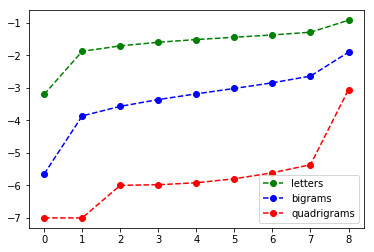

In [18]:
#%% Computation of quantiles
nb_of_quantiles=9 # equal to nb of bins - 1 (eg there are 9 deciles and not 10!)
bins_to_display=range(0,nb_of_quantiles) # all = range(0,nb_of_quantiles)
quantiles_frletters=np.quantile(a.frletters,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of letters 
quantiles_frbigrams=np.quantile(a.frbigrams,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of bigrams
quantiles_frquadrigrams=np.quantile(a.frquadrigrams,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of bigrams

letters, = plt.plot(quantiles_frletters[bins_to_display], label='letters', color='green', marker='o',linestyle='dashed')
bigrams, = plt.plot(quantiles_frbigrams[bins_to_display], label='bigrams', color='blue', marker='o',linestyle='dashed')
quadrigrams, = plt.plot(quantiles_frquadrigrams[bins_to_display], label='quadrigrams', color='red', marker='o',linestyle='dashed')
plt.legend(handles=[letters, bigrams, quadrigrams])

In [19]:
#%% select a subset of lines to work on
criterion=(a.item == a.item) # keep everything
# criterion=(a.frminquadrigrams > 0) # here we keep only strings whose quadrigrams ALL exist
# criterion=((a.frminquadrigrams > 0) & (a.frbigrams > -3.5)) # AND not too unfrequent mean bigrams
# criterion=(1-a.frisword)&(1-a.enisword) # keeps only nonwords

#criterion=((a.frquadrigrams < quantiles_frquadrigrams[9])
#           & (a.frbigrams > quantiles_frbigrams[0])
#           & (a.frletters > quantiles_frletters[0]))

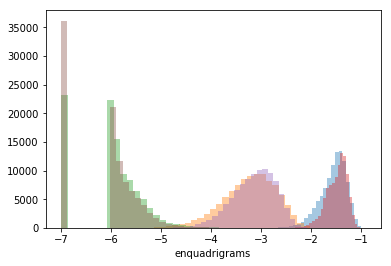

In [20]:
#%% Distribution 1 variable
sns.distplot(a.frletters[criterion], bins=30, kde=False);
sns.distplot(a.frbigrams[criterion], bins=30, kde=False);
sns.distplot(a.frquadrigrams[criterion], bins=30, kde=False);

sns.distplot(a.enletters[criterion], bins=30, kde=False);
sns.distplot(a.enbigrams[criterion], bins=30, kde=False);
sns.distplot(a.enquadrigrams[criterion], bins=30, kde=False);

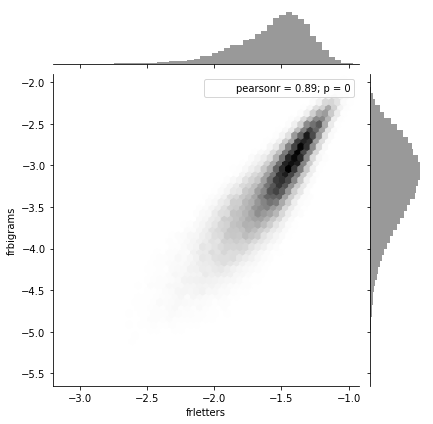

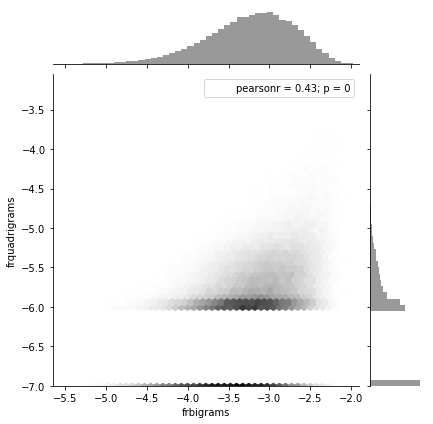

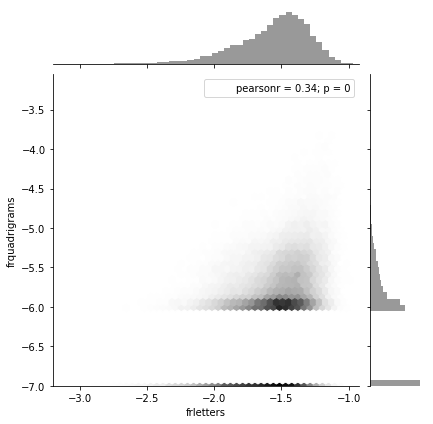

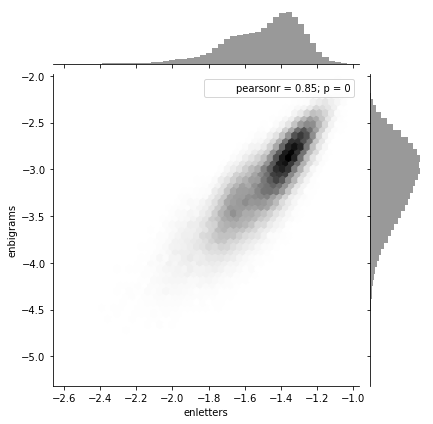

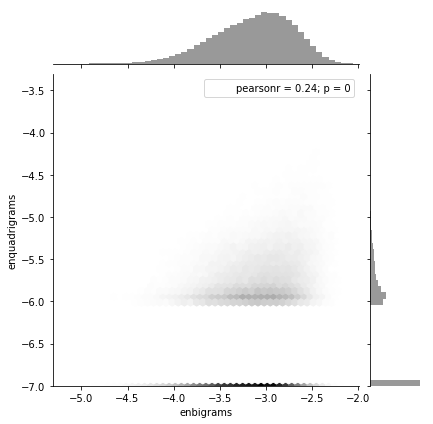

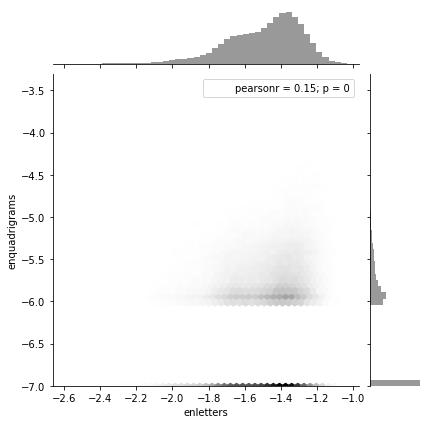

In [21]:
#%% Distribution 2 variables within language
sns.jointplot(a.frletters[criterion], a.frbigrams[criterion], kind="hex", color="k");
sns.jointplot(a.frbigrams[criterion], a.frquadrigrams[criterion], kind="hex", color="k");
sns.jointplot(a.frletters[criterion], a.frquadrigrams[criterion], kind="hex", color="k");

sns.jointplot(a.enletters[criterion], a.enbigrams[criterion], kind="hex", color="k");
sns.jointplot(a.enbigrams[criterion], a.enquadrigrams[criterion], kind="hex", color="k");
sns.jointplot(a.enletters[criterion], a.enquadrigrams[criterion], kind="hex", color="k");

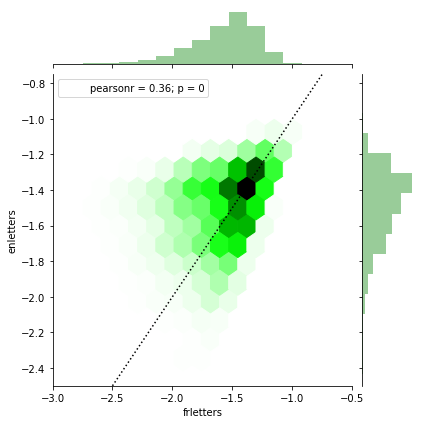

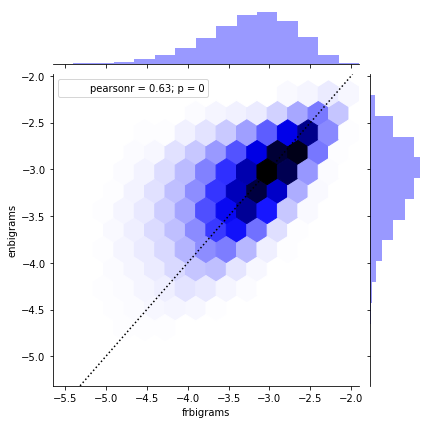

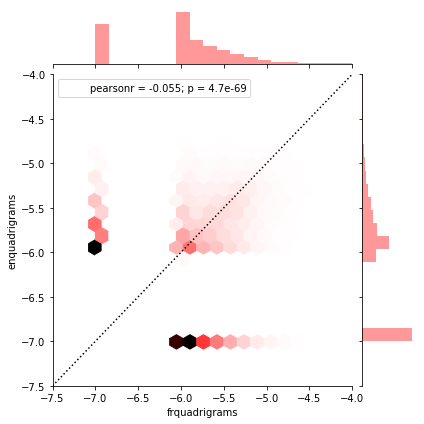

In [22]:
#%% Distribution 2 variables across languages : means
g = sns.jointplot(a.frletters[criterion], a.enletters[criterion], kind="hex", color="g", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15), ylim=(-2.5,-0.75), xlim=(-3,-0.5));
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    
                  
g = sns.jointplot(a.frbigrams[criterion], a.enbigrams[criterion], kind="hex", color="b", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15)); # , ylim=(-4,-1.5), xlim=(-4,-1.5)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

g = sns.jointplot(a.frquadrigrams[criterion], a.enquadrigrams[criterion], kind="hex", color="r", marginal_kws=dict(bins=25),
              joint_kws=dict(gridsize=25), ylim=(-7.5,-4), xlim=(-7.5,-4));
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

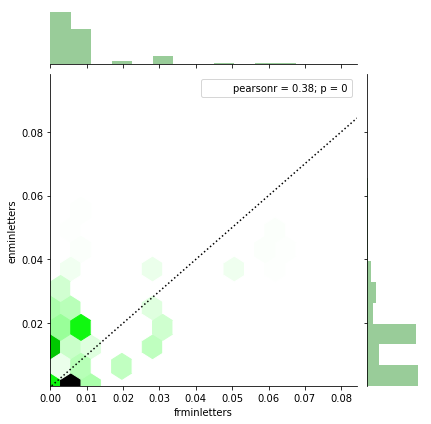

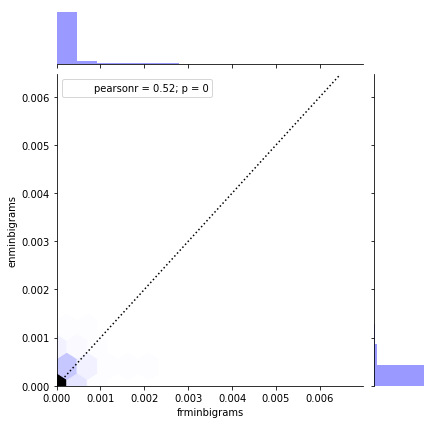

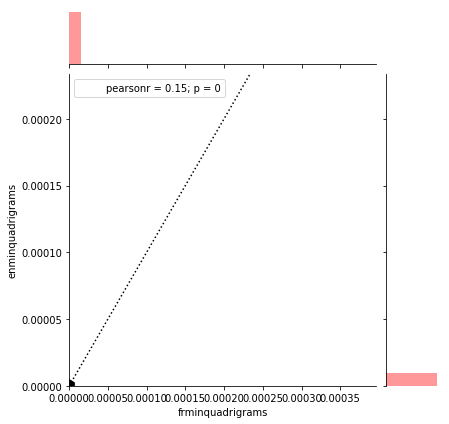

In [23]:
#%% Distribution 2 variables across languages : extrema
g = sns.jointplot(a.frminletters[criterion], a.enminletters[criterion], kind="hex", color="g", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15));
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    
                  
g = sns.jointplot(a.frminbigrams[criterion], a.enminbigrams[criterion], kind="hex", color="b", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15)); # , ylim=(-4,-1.5), xlim=(-4,-1.5)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

g = sns.jointplot(a.frminquadrigrams[criterion], a.enminquadrigrams[criterion], kind="hex", color="r", marginal_kws=dict(bins=25),
              joint_kws=dict(gridsize=25));
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

# sns.jointplot(a.frquadrigrams[criterion], a.enquadrigrams[criterion], kind="hex", color="k", ylim=(-7.5,-4), xlim=(-7.5,-4));

# another possible tool ?
# g = sns.pairplot(a[criterion], vars=["frletters", "frquadrigrams"])
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://stackoverflow.com/questions/29549905/pylab-3d-scatter-plots-with-2d-projections-of-plotted-data

In [24]:
#%%Selecting items
aga=a.loc[a.frisword == 1]
aga

,Unnamed: 0,item,frletters,frminletters,frmaxletters,frbigrams,frminbigrams,frmaxbigrams,frquadrigrams,frminquadrigrams,frmaxquadrigrams,frisword,frfreq,enletters,enminletters,enmaxletters,enbigrams,enminbigrams,enmaxbigrams,enquadrigrams,enminquadrigrams,enmaxquadrigrams,enisword,enfreq
4040,4040,exauce,-1.289236,0.003918,0.168383,-2.752944,8.919779e-05,0.011285,-5.032487,5.136866e-06,0.000020,1.0,1.21,-1.536148,0.000801,0.118396,-3.134089,2.472769e-05,0.006468,-5.496849,0.000000e+00,3.131873e-05,0.0,0.0
12515,2515,stupas,-1.180249,0.030419,0.085246,-2.507220,1.563004e-04,0.014974,-5.365818,0.000000e+00,0.000073,1.0,0.00,-1.324395,0.014225,0.098035,-2.843129,2.782563e-04,0.006945,-5.201248,0.000000e+00,2.480326e-04,0.0,0.0
12570,2570,roquet,-1.271525,0.008283,0.168383,-2.445018,1.102705e-04,0.020352,-3.932536,3.006578e-05,0.000254,1.0,0.23,-1.487665,0.000501,0.118396,-3.137558,5.492881e-06,0.019937,-5.313162,1.434222e-06,1.448857e-05,0.0,0.0
13010,3010,lissai,-1.135335,0.048108,0.085246,-2.192806,3.637061e-03,0.016736,-3.599974,7.830699e-05,0.000464,1.0,0.00,-1.260480,0.037885,0.068982,-2.429003,1.852664e-03,0.008185,-5.572989,2.341587e-07,4.331937e-06,0.0,0.0
40230,230,syrinx,-1.591957,0.002731,0.085246,-3.277061,7.925305e-06,0.009273,-5.586425,0.000000e+00,0.000004,1.0,0.00,-1.592043,0.000801,0.065319,-3.069403,1.153116e-04,0.016229,-5.616082,0.000000e+00,2.780635e-06,0.0,0.0
41436,1436,berces,-1.233306,0.008622,0.168383,-2.323705,9.125490e-04,0.021390,-4.377214,1.441344e-05,0.000079,1.0,0.16,-1.319850,0.015780,0.118396,-2.526532,5.912143e-04,0.014838,-4.864815,0.000000e+00,6.257892e-05,0.0,0.0
43139,3139,baises,-1.198594,0.008622,0.168383,-2.114612,1.268288e-03,0.021390,-3.580051,2.016673e-04,0.000396,1.0,8.25,-1.274436,0.015780,0.118396,-2.382218,1.097759e-03,0.008951,-4.801916,0.000000e+00,1.248944e-04,0.0,0.0
48211,8211,coucou,-1.308844,0.030444,0.064492,-2.446443,8.309399e-04,0.015255,-3.941980,1.399796e-05,0.000487,1.0,12.71,-1.371731,0.019476,0.098011,-2.678448,4.574591e-05,0.019937,-5.393612,0.000000e+00,3.524089e-05,0.0,0.0
69174,9174,divine,-1.234235,0.021863,0.168383,-2.484841,5.307033e-04,0.014414,-4.287190,2.935568e-05,0.000070,1.0,14.00,-1.343715,0.008940,0.118396,-2.795569,8.025962e-05,0.016229,-4.134645,2.379638e-05,5.117247e-04,1.0,438.0
69997,9997,zydeco,-1.657979,0.002731,0.168383,-3.569448,8.361367e-07,0.012870,-5.203776,7.554215e-09,0.000240,1.0,0.01,-1.667462,0.000389,0.118396,-3.337891,1.982496e-05,0.003634,-5.705002,0.000000e+00,6.673524e-06,0.0,0.0


In [25]:
#%% Saving items to csv
aga.to_csv("all_french_strings.csv")